# Initial analysis - Prevention duties

In [6]:
#Setting up environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [7]:
#Importing data

df = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_A2P.csv')

# Analysis of prevention duties owed

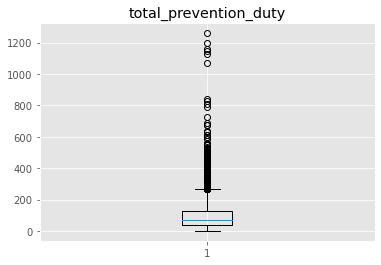

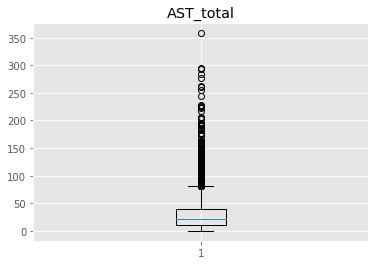

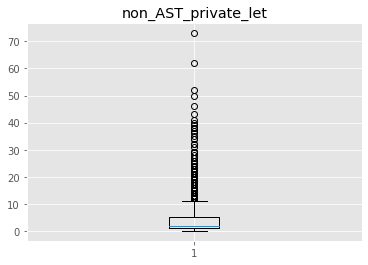

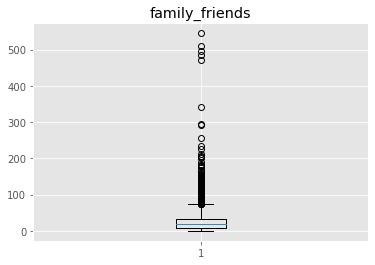

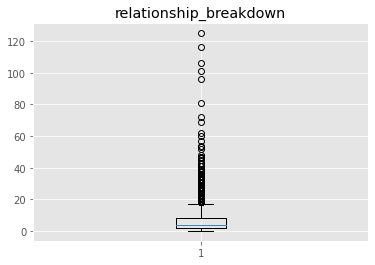

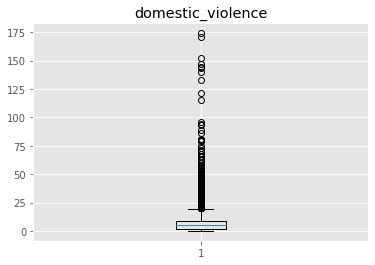

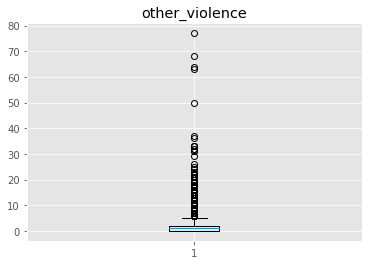

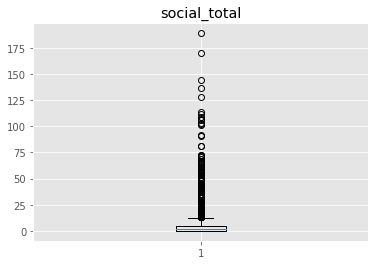

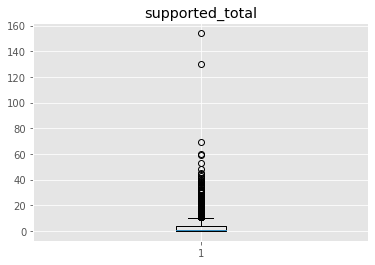

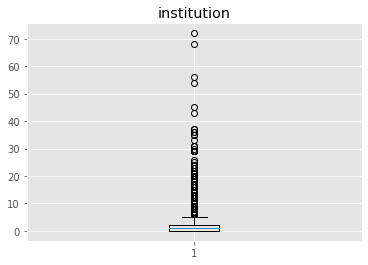

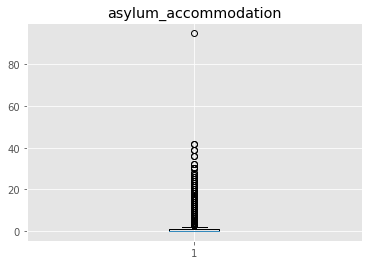

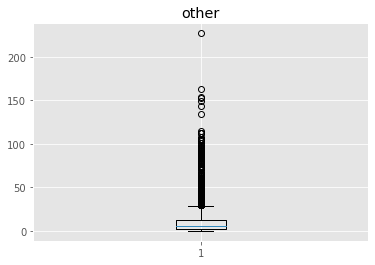

<Figure size 432x288 with 0 Axes>

In [9]:
#Checking for outliers using boxplots

for column in ['total_prevention_duty', 'AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other']:
    if df[column].dtype == 'float64':
        plt.boxplot(df[column])
        plt.title(column)
        plt.show()
        plt.clf()

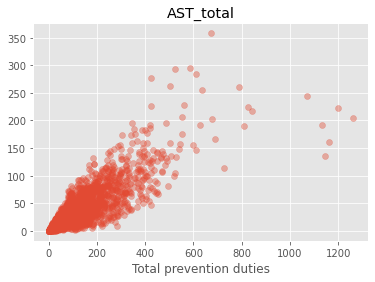

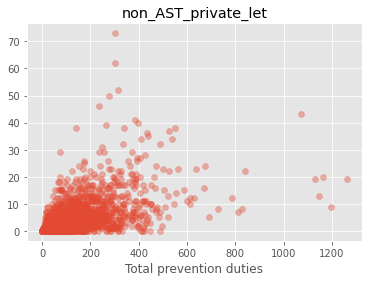

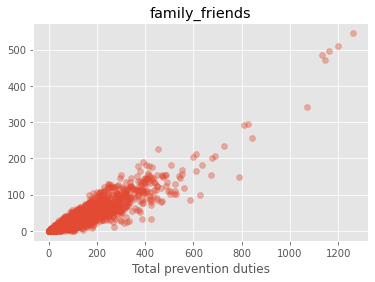

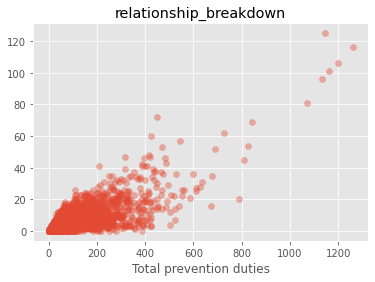

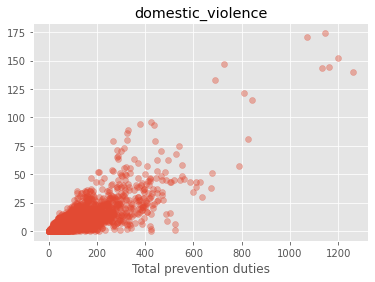

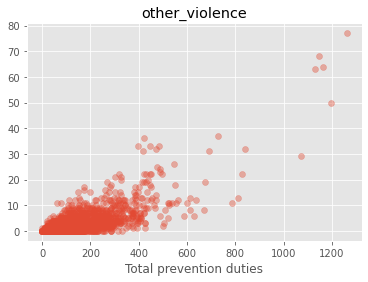

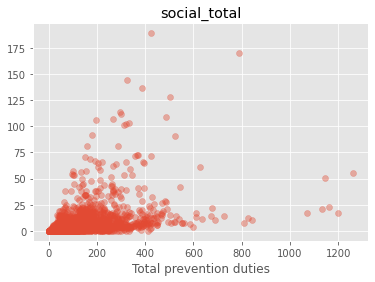

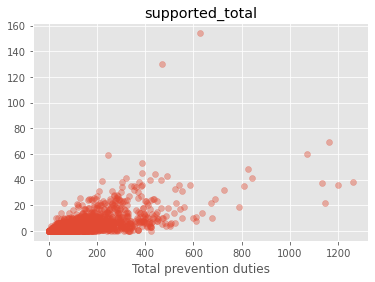

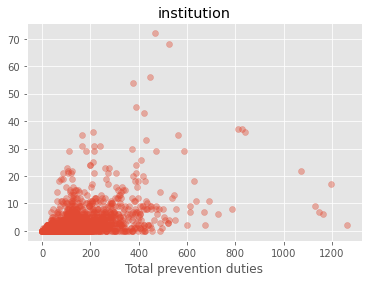

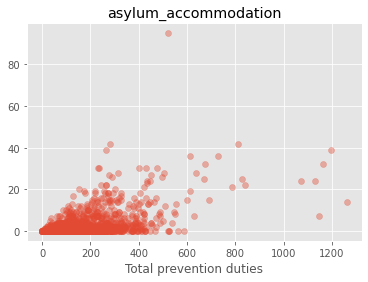

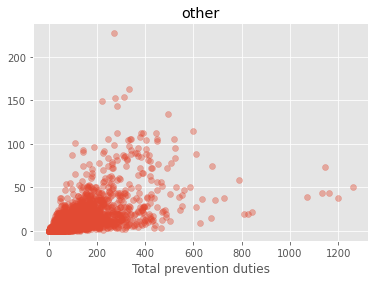

<Figure size 432x288 with 0 Axes>

In [17]:
#Checking for outliers using scatterplots
#Each should show a strong correlation

for column in ['AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other']:
    plt.scatter(df['total_prevention_duty'], df[column], alpha=0.4)
    plt.title(column)
    plt.xlabel('Total prevention duties')
    plt.show()
    plt.clf()

In [11]:
#Filtering the dataset to just show the aggregated categories

df_categories = df[['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other']]
df_categories.head()

,ONS_code,local_authority,total_prevention_duty,AST_total,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,supported_total,institution,asylum_accommodation,other
0,E07000223,Adur,9.0,6.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E07000026,Allerdale,49.0,13.0,2.0,10.0,5.0,8.0,0.0,4.0,1.0,1.0,0.0,5.0
2,E07000032,Amber Valley,63.0,21.0,1.0,23.0,8.0,4.0,0.0,0.0,3.0,1.0,0.0,2.0
3,E07000224,Arun,84.0,40.0,2.0,24.0,4.0,0.0,2.0,6.0,4.0,0.0,1.0,1.0
4,E07000170,Ashfield,51.0,31.0,1.0,6.0,3.0,7.0,0.0,0.0,0.0,1.0,0.0,2.0


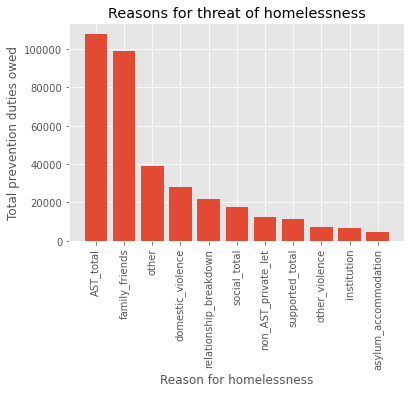

<Figure size 432x288 with 0 Axes>

In [12]:
#Plotting a bar chart showing the most common reasons for threat of homelessness

homelessness_reasons = df_categories.columns[3:]
homelessness_reasons_summed = df[homelessness_reasons].sum().sort_values(ascending=False)

plt.bar(homelessness_reasons_summed.index, homelessness_reasons_summed)
plt.xticks(rotation=90)
plt.title('Reasons for threat of homelessness')
plt.xlabel('Reason for homelessness')
plt.ylabel('Total prevention duties owed')
plt.show()
plt.clf()

In [13]:
#Calculating the above reasons for homelessness as a proportion of the total, for each local authority

for column in homelessness_reasons:
    df['percentage_' + column] = (df[column] / df['total_prevention_duty']).round(2)

In [14]:
#Showing a filtered dataframe with just the calculated percentages

df_percentages = df.filter(df.columns[0:2].tolist() + [column for column in df.columns if 'percentage' in column])

display(df_percentages.head())

df_percentages.describe()

,ONS_code,local_authority,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other
0,E07000223,Adur,0.67,0.00,0.22,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00
1,E07000026,Allerdale,0.27,0.04,0.20,0.10,0.16,0.00,0.08,0.02,0.02,0.00,0.10
2,E07000032,Amber Valley,0.33,0.02,0.37,0.13,0.06,0.00,0.00,0.05,0.02,0.00,0.03
3,E07000224,Arun,0.48,0.02,0.29,0.05,0.00,0.02,0.07,0.05,0.00,0.01,0.01
4,E07000170,Ashfield,0.61,0.02,0.12,0.06,0.14,0.00,0.00,0.00,0.02,0.00,0.04


,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other
count,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000
mean,0.326522,0.038640,0.265893,0.070420,0.075156,0.017212,0.044462,0.025999,0.015297,0.007518,0.113434
std,0.155444,0.044506,0.112551,0.056878,0.057006,0.026417,0.063171,0.032499,0.026197,0.017806,0.104796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210000,0.010000,0.190000,0.030000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
50%,0.310000,0.030000,0.260000,0.060000,0.070000,0.010000,0.030000,0.020000,0.000000,0.000000,0.090000
75%,0.420000,0.050000,0.340000,0.090000,0.100000,0.030000,0.050000,0.040000,0.020000,0.010000,0.160000
max,1.000000,0.470000,1.000000,1.000000,0.500000,1.000000,0.570000,0.340000,0.260000,0.180000,1.000000


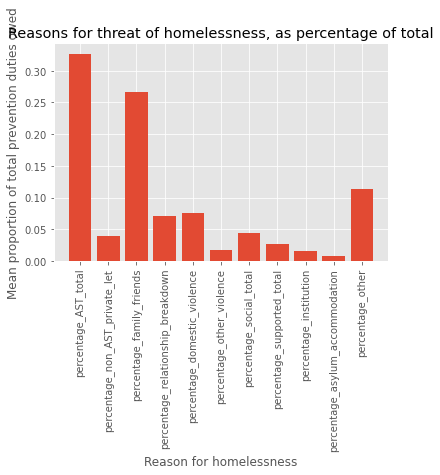

In [15]:
#Showing the calculated percentages as a bar chart

#percentages_mean = df[df_percentages.columns[2:]].mean().sort_values(ascending=False)
percentages_mean = df[df_percentages.columns[2:]].mean()

plt.bar(percentages_mean.index, percentages_mean)
plt.xticks(rotation=90)
plt.title('Reasons for threat of homelessness, as percentage of total')
plt.xlabel('Reason for homelessness')
plt.ylabel('Mean proportion of total prevention duties owed')
plt.show()

In [16]:
#Analysing South Gloucestershire as an example

percentages_SG = df.loc[df['local_authority'] == 'South Gloucestershire'][df_percentages.columns[2:]].squeeze().sort_values(ascending=False)

plt.bar(percentages_mean.index, percentages_mean, label='Mean of all local authorities', alpha=0.5)
plt.bar(percentages_mean.index, percentages_SG, label='South Glos', alpha=0.5)
plt.xticks(rotation=90)
plt.title('South Glos Reasons for Homelessness')
plt.xlabel('Reason for homelessness')
plt.ylabel('Proportion of total prevention duties owed')
plt.legend()
plt.show()

percentages_SG.describe

TypeError: sort_values() missing 1 required positional argument: 'by'

In [19]:
#Grouping data by quarter

total_per_quarter = df.groupby(['year', 'quarter'])['total_prevention_duty'].sum()

print(total_per_quarter.index)
total_per_quarter.index = total_per_quarter.index.map(lambda x: f"Q{x[1]}-{x[0]}")

print(total_per_quarter.index)
print(total_per_quarter.values)

MultiIndex([(2020, 1),
            (2020, 2),
            (2020, 3),
            (2020, 4),
            (2021, 1),
            (2021, 2),
            (2021, 3),
            (2021, 4),
            (2022, 1),
            (2022, 2),
            (2022, 3)],
           names=['year', 'quarter'])
Index(['Q1-2020', 'Q2-2020', 'Q3-2020', 'Q4-2020', 'Q1-2021', 'Q2-2021',
       'Q3-2021', 'Q4-2021', 'Q1-2022', 'Q2-2022', 'Q3-2022'],
      dtype='object')
[25854. 32472. 29067. 33012. 31826. 31758. 32242. 37749. 34384. 35190.
 31463.]


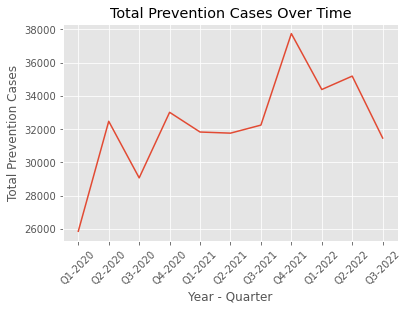

In [20]:
#Line chart showing how the total number of prevention cases have changed over time

plt.plot(total_per_quarter.index, total_per_quarter.values)
plt.xticks(rotation=45)
plt.ylabel('Total Prevention Cases')
plt.xlabel('Year - Quarter')
plt.title('Total Prevention Cases Over Time')
plt.show()

In [ ]:
#Which authorities have the highest percentage of homelessness from the private sector?

#Filter to just show authorities with over 150 prevention cases per quarter. These percentages will be more meaningful.
over_150_preventions = joined_df_A2P[joined_df_A2P['total_prevention_duty'] > 150]

#For each authority, average the percentage of homelessness from AST across the quarters
to_plot = over_150_preventions.groupby('local_authority')['percentage_AST_total'].mean().sort_values()

#Plot onto a bar chart

fig, ax = plt.subplots(figsize=(16, 25))
ax.barh(to_plot.index, to_plot)
plt.title('Percentage of homelessness from private sector')
plt.xlabel('Percentage of prevention duties due to end of AST')
plt.ylabel('Local Authority')
plt.xticks(np.arange(0, 1.1, 0.1))
ax.tick_params(labeltop=True)
plt.ylim(-1, 112)
plt.show()

# Analysis of successful preventions

In [ ]:
#Checking correlation. Successful preventions should correlate with number of prevention duties owed.

plt.scatter(df['total_prevention_duty'], df['total_successful_prevention'])
plt.xlabel('Prevention duties owed')
plt.ylabel('Successful preventions')
plt.title('Successful preventions and prevention duties owed')
plt.show()

In [ ]:
#Checking the outlier where the number of successful preventions is significantly more than the number of duties owed

display(df[(df['total_successful_prevention'] > 400) & (df['total_prevention_duty'] < 400)])

In [ ]:
#Checking the rows with significantly higher numbers in both categories

display(df[(df['total_prevention_duty'] > 750)])

#All but one are Leeds. This suggests that Leeds is reporting data differently from other local authorities.

In [ ]:
#Looking for any obvious correlation between deprivation in area and numbers threatened with homelessness

plt.scatter(df['deprivation_score'], df['total_prevention_duty'])
plt.ylabel('Number of prevention duties owed')
plt.xlabel('Deprivation score in area')
plt.title('Deprivation & threat of homelessness')
plt.show()

In [ ]:
#Plotting a heatmap with the census data to look for any correlation

correlation_matrix = df[['total_prevention_duty', 'median_age', 'population_density',
                       'number_unemployed', 'percent_unemployed', 'deprivation_score', 'proportion_prevented']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation: Area characteristics and threat of homelessness')
plt.show()

In [ ]:
#Creating an aggregated dataframe with just one row for each local authority, showing the mean quarterly data

grouped_df = df.groupby('local_authority', as_index=False).mean()
grouped_df[['region_name', 'ONS_code', 'region_code']] = df[['region_name', 'ONS_code', 'region_code']]

#Reducing the columns, taking out the more detailed breakdowns for reason for threat of homelessness and outcome

columns_to_keep = ['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other_x',
       'total_successful_prevention', 'total_PRS', 'total_SRS', 'family', 'friends', 'owner_occupier', 'other_y', 'not_known', 'region_code', 'region_name', 'median_age', 'population_density', 'number_unemployed', 'percent_unemployed', 'deprivation_score', 'proportion_prevented']
grouped_df = grouped_df[columns_to_keep]

In [ ]:
#Removing all the columns I added with the calculated percentage, to make the dataframe clearer to work with

columns_to_keep = df.columns[~df.columns.str.startswith('percentage_')]
df = df[columns_to_keep]